# 1 Import and Init

In [461]:
import numpy as np
import matplotlib.pyplot as plt
import random 
seed=1996
np.random.seed(seed)
random.seed(seed)

In [521]:
N,k=150,10
learning_rate=0.001
mu=np.zeros(k)
sigma=2 # " dans la papier sigma_square=100"
std=sigma*np.identity(k)
beta_none=np.array([(i+1)/100 for i in range(k) ]).reshape(k,1)
X=np.random.randn(N,k)
B=10000
beta_none[1:3]

array([[0.02],
       [0.03]])

In [463]:
beta_none[1:2]

array([[0.02]])

In [522]:
min_=np.mean(X,axis=0)
max_=np.max(X,axis=0)
X=(X-min_)/max_-min_

#  2 DGP

In [523]:
def indicator(x,threshold=0) :
    if x>=threshold:
        return int(1)
    else:
            return int(0)

In [524]:
X.shape,beta_none.shape

((150, 10), (10, 1))

In [525]:
Y=np.zeros(N).reshape(N,1)
for i in range(N):
    z=np.random.randn(1)
    Y[i]=indicator(np.dot(X[i],beta_none))

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 87.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

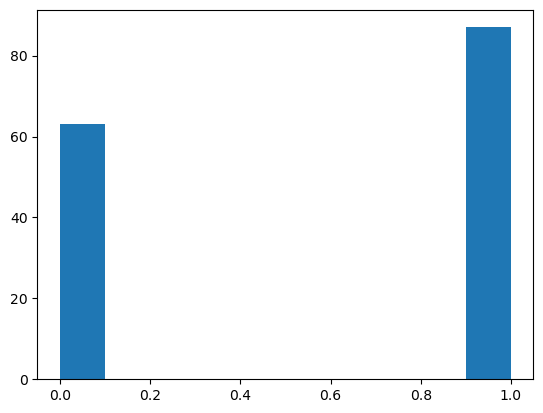

In [526]:
plt.hist(Y)

In [527]:
Y.shape

(150, 1)

In [532]:
def log_lik(X,Y,beta):
    beta_t=beta.transpose()
    X_t=X.transpose()
    ll=np.dot(beta_t,np.dot(X_t,Y))
    for i in range(N):
        ll=ll-np.log(1+np.exp(np.dot((X[i,:].reshape(k,1)),beta.reshape(1,k))))
    return ll[0][0]

In [533]:
log_lik(X,Y,beta_none)

-98.75870465437521

In [534]:
def link_fun(x):
    return 1/(1+np.exp(-x))

In [690]:
def density_value(beta,mu,var_):
    beta=beta.reshape(k,1)
    mu=mu.reshape(k,1)
    gap=beta-mu
    gap_t=gap.transpose()
    pi=np.pi
    det=np.linalg.det(var_)
    in_var=np.linalg.inv(var_)
    const_=np.sqrt(((2*np.pi)**k)*det)
    inv_const=np.round(1/const_,100)
    v=np.dot(gap_t,np.dot(in_var,gap))
    x=np.exp((-1/2)*v)
    value=inv_const*x
    return value[0][0]

In [623]:
def grad_log_lik(X,Y,beta):
    X_t=X.transpose()
    gll=X_t@Y
    for n in range(N):
        value=np.dot(X[i,:],beta)[0]
        gll=gll-link_fun(value)*(X[i,:].reshape(k,1))
    return gll
    

In [624]:
learning_rate*0.1,grad_log_lik(X,Y,beta_none)

(0.0001,
 array([[-35.13660461],
        [ -6.05479829],
        [ 54.05877249],
        [ 14.8671099 ],
        [  8.10252443],
        [-32.51009181],
        [ 11.89690524],
        [ 12.74440787],
        [  0.42962362],
        [ 13.99109151]]))

In [625]:
def mala_drawner(X,Y,curren_beta):
    z=np.random.randn(k,1)
    e=0.01*learning_rate
    gll=grad_log_lik(X,Y,curren_beta)
    proposal_value=curren_beta+e*e*gll/2 +e*z
    return proposal_value


In [626]:
mala_drawner(X,Y,beta_none)[0:5],beta_none[0:5]

(array([[0.01000484],
        [0.01999882],
        [0.03000569],
        [0.03999563],
        [0.05000469]]),
 array([[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]]))

In [627]:
mala_drawner(X,Y,beta_none)

array([[0.01000996],
       [0.01998749],
       [0.02999726],
       [0.04000059],
       [0.05000472],
       [0.06000185],
       [0.07000047],
       [0.0800071 ],
       [0.08999962],
       [0.10000922]])

In [629]:
mu=np.zeros(k)
sigma=2 # " dans la papier sigma_square=100"
var_=sigma*sigma*np.identity(k)
density_value(beta_none,mu,var_)*np.sqrt(((2*np.pi)**k))

0.0009718740835196074

In [630]:
def MALA_proposal_mean(X,Y,current_beta):
   e=0.001*learning_rate
   gll=grad_log_lik(X,Y,current_beta)
   prop_mean=current_beta+e*e*gll/2 

   return prop_mean


In [631]:
learning_rate

0.001

In [632]:
MALA_proposal_mean(X,Y,beta_none)

array([[0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ]])

In [568]:
learning_rate

0.001

In [633]:
def MALA_proposal_var():
    e=0.001*learning_rate
    prop_var=(e)*np.identity(k)

    return prop_var

In [634]:
MALA_proposal_var().shape

(10, 10)

In [635]:
def MALA_aceptance_rate(beta1,beta2,X=X,Y=Y):
    ee=0.00001
    q_var=MALA_proposal_var()
    q_mu1=MALA_proposal_mean(X,Y,beta1)
    q_mu2=MALA_proposal_mean(X,Y,beta2)
    #   prior density
    p1=density_value(beta1,mu,var_)
    p2=density_value(beta2,mu,var_)
    # proposal density 
    q1=density_value(beta1,q_mu1,q_var)
    q2=density_value(beta2,q_mu2,q_var)
    rate= ee+ ((p2*q1)+ee)/((p1*q2)+ee)
    return np.log(rate)

In [638]:
MALA_aceptance_rate(np.zeros(k).reshape(k,1),beta_none)

-0.0048024518094963945

In [639]:
def MALA_one_iter(beta,X=X,Y=Y):
    prop_beta=mala_drawner(X,Y,beta)
    log_rate=MALA_aceptance_rate(beta,prop_beta,X=X,Y=Y)
    u=np.random.uniform(0, 1)
    ee=0.00001
    if (log_rate>0) or (log_rate>np.log(u+ee)):
        return prop_beta
    else :
        return beta
     

In [640]:
MALA_one_iter(beta_none,X=X,Y=Y)[0:3],beta_none[0:3]

(array([[0.01000864],
        [0.0199887 ],
        [0.03000819]]),
 array([[0.01],
        [0.02],
        [0.03]]))

In [641]:
def MALA_Run(X=X,Y=Y,B=1,initial_state=np.zeros(k).reshape(k,1)):
    current_beta=initial_state
    beta_chaine=[]
    for i in range(B):
        current_beta=MALA_one_iter(current_beta,X=X,Y=Y)
        beta_chaine.append(current_beta)

    return beta_chaine


In [642]:
chaine_1=MALA_Run(B=1000)
last_value1=chaine_1[-1]
last_value1[-1],beta_none[-1]

(array([4.3402826e-05]), array([0.1]))

In [643]:
chaine_2=MALA_Run(B=1000,initial_state=last_value1)
last_value2=chaine_2[-1]
last_value2[-1],beta_none[-1]

(array([0.00023401]), array([0.1]))

In [644]:
chaine_3=MALA_Run(B=1000,initial_state=last_value2)
last_value3=chaine_3[-1]
last_value3[-1],beta_none[-1]

(array([-0.00019753]), array([0.1]))

In [646]:
chaine_4=MALA_Run(B=1000,initial_state=last_value3)
last_value4=chaine_4[-1]
last_value4[-1],beta_none[-1]

(array([-0.00059634]), array([0.1]))

In [647]:
chaine_5=MALA_Run(B=1000,initial_state=last_value4)
last_value5=chaine_5[-1]
last_value5[-1],beta_none[-1]

(array([-0.00068375]), array([0.1]))

In [651]:
chaine_6=MALA_Run(B=10000,initial_state=last_value5)
last_value6=chaine_6[-1]
last_value6[-1],beta_none[-1]

(array([0.00103031]), array([0.1]))

In [504]:
chaine_5=MALA_Run(B=5000,initial_state=last_value4)
last_value5=chaine_5[-1]
last_value5[-1],beta_none[-1]

(array([-9.95934872]), array([0.1]))

In [459]:
chaine_6=MALA_Run(B=1000,initial_state=last_value5)
last_value6=chaine_6[-1]
last_value6[-1],beta_none[-1]

(array([5.08413307e-05]), array([0.1]))

In [685]:
chaine_7=MALA_Run(B=1000,initial_state=last_value6)
last_value7=chaine_7[-1]
last_value7[-1],beta_none[-1]

(array([0.00160498]), array([0.1]))

In [686]:
chaine_8=MALA_Run(B=1000,initial_state=last_value7)
last_value8=chaine_8[-1]
last_value8[-1],beta_none[-1]

(array([0.00255762]), array([0.1]))

In [687]:
chaine_9=MALA_Run(B=1000,initial_state=last_value8)
last_value9=chaine_9[-1]
last_value9[-1],beta_none[-1]

(array([0.00224504]), array([0.1]))

In [688]:
chaine_10=MALA_Run(B=1000,initial_state=last_value9)
last_value10=chaine_10[-1]
last_value10[-1],beta_none[-1]

(array([0.00201298]), array([0.1]))

In [689]:
chaine_11=MALA_Run(B=1000,initial_state=last_value10)
last_value11=chaine_11[-1]
last_value11[-1],beta_none[-1]

(array([0.00209686]), array([0.1]))

(array([143., 153., 126., 260., 222., 258., 275., 251., 154., 158.]),
 array([0.00088904, 0.00095409, 0.00101915, 0.0010842 , 0.00114925,
        0.00121431, 0.00127936, 0.00134441, 0.00140946, 0.00147452,
        0.00153957]),
 <BarContainer object of 10 artists>)

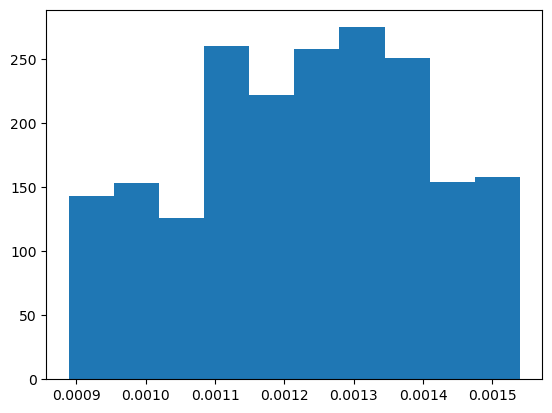